In [62]:
import numpy as np
import pandas as pd
import sklearn
from scipy import random

import matplotlib.pyplot as plt

In [97]:
random.seed(42)

In [98]:
num_distros = 2
means = random.randint(-10, 10, (num_distros, 2))
stds = random.randint(10, 12, (num_distros, 2))

In [99]:
num_obs = 100

In [100]:
class1 = random.multivariate_normal(means[1], np.diag(stds[1]), size = num_obs)
class0 = random.multivariate_normal(means[0], np.diag(stds[0]), size = num_obs)

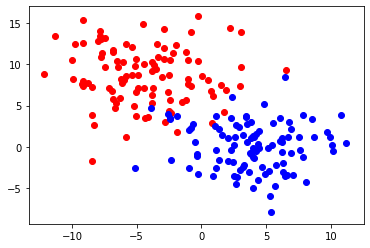

In [101]:
plt.scatter(class0[:,0], class0[:,1], c='red')
plt.scatter(class1[:,0], class1[:,1], c='blue')

In [113]:
X = np.vstack([class0, class1])
Y = np.hstack([np.zeros(num_obs), np.ones(num_obs)]).reshape(-1,1)

In [115]:
import statsmodels.api as sm

In [118]:
smodel = sm.OLS(Y, sm.add_constant(X))

In [120]:
sres = smodel.fit()

In [122]:
sres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     300.7
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.37e-60
Time:                        08:48:13   Log-Likelihood:                -5.2196
No. Observations:                 200   AIC:                             16.44
Df Residuals:                     197   BIC:                             26.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7302      0.025     28.659      0.000       0.680       0.780
x1             0.0395      0.004      9.216      0.000       0.031       0.048
x2            -0.0504      0.004    -11.661      0.000      -0.059      -0.042
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.553
Skew:                          -0.059   Prob(JB):                        0.758
Kurtosis:                       2.771   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
sres.params

array([ 0.73022506,  0.03951348, -0.05037758])

In [129]:
def decision_line(x):
    return (0.5 - sres.params[0] - sres.params[1]*x)/sres.params[2]

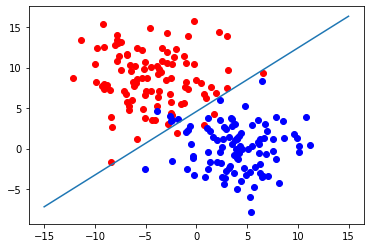

In [130]:
plt.scatter(class0[:,0], class0[:,1], c='red')
plt.scatter(class1[:,0], class1[:,1], c='blue')
xvals = np.linspace(-15,15,100)
plt.plot(xvals,decision_line(xvals) )

# KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X,Y)

<ipython-input-131-2eb32feb23dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X,Y)


KNeighborsClassifier()

In [132]:
y_pred = classifier.predict(X)

In [133]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [136]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[94  6]
 [ 3 97]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       100
         1.0       0.94      0.97      0.96       100

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [48]:
num_distros = 10
means = random.randint(-10, 10, (num_distros, 2))
stds = random.randint(1, 5, (num_distros, 2))

In [49]:
num_obs = 1000

observations = []
for _ in range(num_obs):
    i = random.choice(num_distros)
    observations.append( random.multivariate_normal(means[i], np.diag(stds[i])))

In [50]:
observations = np.array(observations)

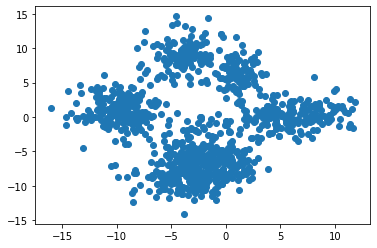

In [51]:
plt.scatter(observations[:,0], observations[:,1])